In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# Load the data
df = pd.read_csv('../data/BrentOilPrices.csv')

# Show first 5 rows
print(df.head())

# Show basic information
print(df.info())

# Show statistics
print(df.describe())

        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63
<class 'pandas.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   str    
 1   Price   9011 non-null   float64
dtypes: float64(1), str(1)
memory usage: 140.9 KB
None
             Price
count  9011.000000
mean     48.420782
std      32.860110
min       9.100000
25%      19.050000
50%      38.570000
75%      70.090000
max     143.950000


In [7]:
import pandas as pd

# Show original data
print("Original data info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# Clean up date column
print("\n=== CLEANING DATE COLUMN ===")

# Remove any extra whitespace
df['Date'] = df['Date'].astype(str).str.strip()

# Try multiple conversion methods
def convert_dates(date_series):
    """Try multiple methods to convert dates"""
    
    # Method 1: Direct conversion
    dates = pd.to_datetime(date_series, errors='coerce')
    
    # If some failed, try with common formats
    if dates.isna().any():
        print(f"  Direct conversion failed for {dates.isna().sum()} dates")
        
        # Try common formats
        formats_to_try = [
            '%b %d, %Y',      # Apr 22, 2020
            '%d-%b-%y',       # 22-Apr-20
            '%Y-%m-%d',       # 2020-04-22
            '%m/%d/%Y',       # 04/22/2020
            '%d/%m/%Y',       # 22/04/2020
            '%B %d, %Y',      # April 22, 2020 (full month name)
        ]
        
        for fmt in formats_to_try:
            temp_dates = pd.to_datetime(date_series, format=fmt, errors='coerce')
            fixed_count = temp_dates.notna().sum() - dates.notna().sum()
            if fixed_count > 0:
                print(f"  Format '{fmt}' fixed {fixed_count} dates")
                dates = dates.combine_first(temp_dates)
    
    return dates

# Convert dates
df['Date_clean'] = convert_dates(df['Date'])

# Check results
print(f"\n=== CONVERSION RESULTS ===")
print(f"Total rows: {len(df)}")
print(f"Successfully converted: {df['Date_clean'].notna().sum()}")
print(f"Failed to convert: {df['Date_clean'].isna().sum()}")

if df['Date_clean'].isna().sum() > 0:
    print("\nRows that failed conversion:")
    print(df[df['Date_clean'].isna()]['Date'].head(10).tolist())
else:
    print("\nAll dates converted successfully!")
    
    # Set as main date column and remove temp
    df['Date'] = df['Date_clean']
    df = df.drop('Date_clean', axis=1)
    
    # Sort by date
    df = df.sort_values('Date')
    
    # Show results
    print("\n=== FINAL DATA ===")
    print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
    print(f"Total days: {len(df)}")
    print("\nFirst 5 dates:")
    print(df['Date'].head())
    print("\nLast 5 dates:")
    print(df['Date'].tail())

Original data info:
<class 'pandas.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         9011 non-null   str           
 1   Price        9011 non-null   float64       
 2   Date_auto    9011 non-null   datetime64[us]
 3   Date_coerce  9011 non-null   datetime64[us]
dtypes: datetime64[us](2), float64(1), str(1)
memory usage: 281.7 KB
None

First 5 rows:
        Date  Price  Date_auto Date_coerce
0  20-May-87  18.63 1987-05-20  1987-05-20
1  21-May-87  18.45 1987-05-21  1987-05-21
2  22-May-87  18.55 1987-05-22  1987-05-22
3  25-May-87  18.60 1987-05-25  1987-05-25
4  26-May-87  18.63 1987-05-26  1987-05-26

=== CLEANING DATE COLUMN ===


C:\Users\DELL\AppData\Local\Temp\ipykernel_9340\3445647148.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates = pd.to_datetime(date_series, errors='coerce')



=== CONVERSION RESULTS ===
Total rows: 9011
Successfully converted: 9011
Failed to convert: 0

All dates converted successfully!

=== FINAL DATA ===
Date range: 1987-05-20 00:00:00 to 2022-11-14 00:00:00
Total days: 9011

First 5 dates:
0   1987-05-20
1   1987-05-21
2   1987-05-22
3   1987-05-25
4   1987-05-26
Name: Date, dtype: datetime64[us]

Last 5 dates:
9006   2022-11-08
9007   2022-11-09
9008   2022-11-10
9009   2022-11-11
9010   2022-11-14
Name: Date, dtype: datetime64[us]


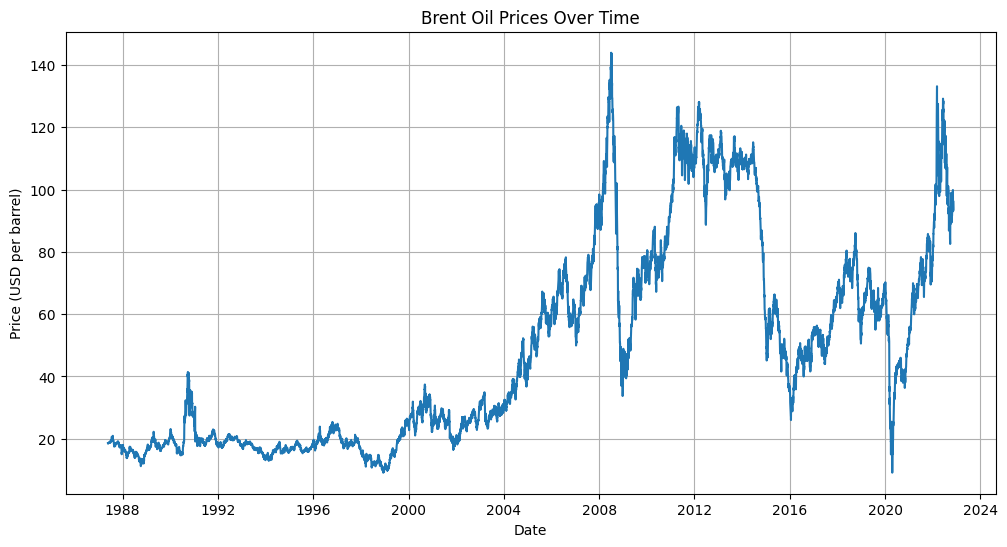

In [8]:
# Create a simple plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'])
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.grid(True)
plt.show()

Missing values:
Date           0
Price          0
Date_auto      0
Date_coerce    0
dtype: int64


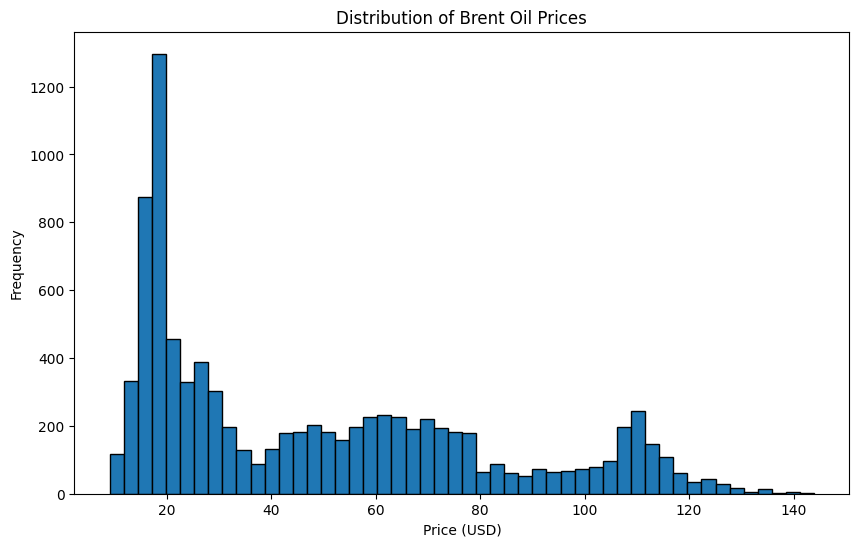

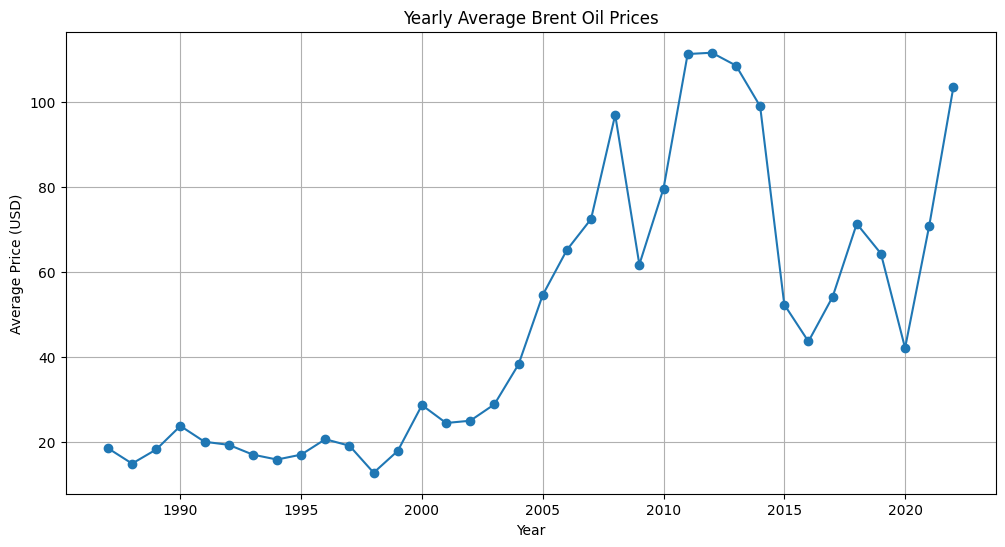

In [9]:
# 1. Check for missing values
print("Missing values:")
print(df.isnull().sum())

# 2. Plot histogram of prices
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=50, edgecolor='black')
plt.title('Distribution of Brent Oil Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

# 3. Calculate and plot yearly averages
df['Year'] = df['Date'].dt.year
yearly_avg = df.groupby('Year')['Price'].mean()

plt.figure(figsize=(12, 6))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o')
plt.title('Yearly Average Brent Oil Prices')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.grid(True)
plt.show()
